In [1]:
"""
From canesm_LE_regression.py
11/16/2015
"""

'\nFrom canesm_LE_regression.py\n11/16/2015\n'

In [2]:
import cccmaplots as cplt
import cccmaNC as cnc
import cccmautils as cutl
import constants as con
import cccmacmaps as ccm
import platform as platform
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm
import loadLE as le
import scipy.io as sio


%matplotlib inline


local=True
matdir = '/HOME/rkm/pyscripts/pymatfiles/'
npydir = '/HOME/rkm/pyscripts/pynpyfiles/'

casename='historical'
timesel2='1979-01-01,2012-12-31'

timeselc='1979-01-01,1989-12-31'
timeselp='2002-01-01,2012-12-31'

save1dmat=False # includes SLP
#save1dmat2=False   # SLP

save2dmat1=False # Z500
save2dmat2=False # SAT
save2dmat3=False # SLP
# otherwise load matfiles

regions = {'EUR': 'eurasiamori',
           'BKS': 'bksmori',
           'GM': 'gm',
           'NH': 'nh',
           'EPAC': 'etroppac'}

convs = {'sat': 1,
         'sat2': 1,
         'z500': 1, #1/con.get_g(),
         'sic': 1,
         'slp': 1/100.} # change slp to hPa

sea=seasp=sear='DJF'

lat=le.get_lat(local=local)
lon=le.get_lon(local=local)
nlat=len(lat); nlon=len(lon)


lat: squeezing data upon read all
lon: squeezing data upon read all


In [3]:
# 1D

if save1dmat:

    fdictbkssic = {'field': 'sic'+ regions['BKS'], 'ncfield': 'sic', 'comp': 'OImon'}
    conv=convs['sic']
    ledatbkssic = le.load_LEdata(fdictbkssic,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)

    #1D
    fdicteursat = {'field': 'tas'+ regions['EUR'], 'ncfield': 'tas', 'comp': 'Amon'}
    conv=convs['sat']
    ledateursat = le.load_LEdata(fdicteursat,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)


    lebkssicr = cutl.seasonalize(ledatbkssic.T,season=sea)
    leeursatr = cutl.seasonalize(ledateursat.T,season=sea)

    
    # sic and sat
    matname = npydir + 'regressdat/' + regions['BKS'] + 'sic_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    np.save(matname, np.array(lebkssicr))

    matname = npydir + 'regressdat/' + regions['EUR'] + 'sat_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    np.save(matname, np.array(leeursatr))
    
    ## sic and sat
    #matname = matdir + 'regressdat/' + regions['BKS'] + 'sic_' + \
    #    sea + '_LEtimeseries' + timesel2 +'.mat' 
    #sio.savemat(matname, {'lebkssicr':lebkssicr})

    #matname = matdir + 'regressdat/' + regions['EUR'] + 'sat_' + \
    #    sea + '_LEtimeseries' + timesel2 +'.mat' 
    #sio.savemat(matname, {'leeursatr':leeursatr})
    
    
    # get 1D circulation index data for regression
    fdictbksz = {'field': 'zg50000.00'+ regions['BKS'], 'ncfield': 'zg', 'comp': 'Amon'}
    casename = 'historical'
    conv=convs['z500']
    ledatbksz = le.load_LEdata(fdictbksz,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)


    fdicteurz = {'field': 'zg50000.00'+ regions['EUR'], 'ncfield': 'zg', 'comp': 'Amon'}
    ledateurz = le.load_LEdata(fdicteurz,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)
    lebkszr = cutl.seasonalize(ledatbksz.T,season=sea)
    leeurzr = cutl.seasonalize(ledateurz.T,season=sea)

    lecirczr = lebkszr - leeurzr
    #@@lecirczrstd = lebkszr/lebkszr.std(axis=0) - leeurzr/leeurzr.std(axis=0)
    lecirczrstd = (lebkszr-lebkszr.mean(axis=0))/lebkszr.std(axis=0) -\
                  (leeurzr-leeurzr.mean(axis=0))/leeurzr.std(axis=0)

    # circulation
    matname = npydir + 'regressdat/' + regions['BKS'] + 'z500_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    np.save(matname,np.array(lebkszr))

    matname = npydir + 'regressdat/' + regions['EUR'] + 'z500_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    np.save(matname, np.array(leeurzr))

    matname = npydir + 'regressdat/circidx_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    np.save(matname, np.array(lecirczr))
    
    matname = npydir + 'regressdat/circidxstd_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    np.save(matname, np.array(lecirczrstd))

    
    
    # SLP... added later
    
    # get 1D SLP circulation index data for regression
    fdictbksp = {'field': 'psl'+ regions['BKS'], 'ncfield': 'psl', 'comp': 'Amon'}
    casename = 'historical'
    conv=convs['slp']
    ledatbksp = le.load_LEdata(fdictbksp,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)


    fdicteurp = {'field': 'psl'+ regions['EUR'], 'ncfield': 'psl', 'comp': 'Amon'}
    ledateurp = le.load_LEdata(fdicteurp,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)
    lebkspr = cutl.seasonalize(ledatbksp.T,season=sea)
    leeurpr = cutl.seasonalize(ledateurp.T,season=sea)

    
    lecircpr = lebkspr - leeurpr
    lecircprstd = (lebkspr-lebkspr.mean(axis=0))/lebkspr.std(axis=0) -\
                  (leeurpr-leeurpr.mean(axis=0))/leeurpr.std(axis=0)

    # SLP circulation
    matname = npydir + 'regressdat/' + regions['BKS'] + 'slp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    np.save(matname,np.array(lebkspr))
    
    matname = npydir + 'regressdat/' + regions['EUR'] + 'slp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    np.save(matname,np.array(leeurpr))


    matname = npydir + 'regressdat/slpcircidx_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    np.save(matname,np.array(lecircpr))
    
    matname = npydir + 'regressdat/slpcircidxstd_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    np.save(matname,np.array(lecircprstd))


else: # load1dmat
    #matname = matdir + 'regressdat/' + regions['BKS'] + 'sic_' + \
    #    sea + '_LEtimeseries' + timesel2 +'.mat'
    #lebkssicr = sio.loadmat(matname, squeeze_me=True)['lebkssicr']
    
    #matname = matdir + 'regressdat/' + regions['EUR'] + 'sat_' + \
    #    sea + '_LEtimeseries' + timesel2 +'.mat' 
    #leeursatr = sio.loadmat(matname, squeeze_me=True)['leeursatr']

    matname = npydir + 'regressdat/' + regions['BKS'] + 'sic_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    lebkssicr = np.load(matname)
    
    matname = npydir + 'regressdat/' + regions['EUR'] + 'sat_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    leeursatr = np.load(matname)
    

    matname = npydir + 'regressdat/' + regions['BKS'] + 'z500_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    lebkszr = np.load(matname)
    
    matname = npydir + 'regressdat/' + regions['EUR'] + 'z500_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    leeurzr = np.load(matname)

    matname = npydir + 'regressdat/circidx_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    lecirczr = np.load(matname)
    
    matname = npydir + 'regressdat/circidxstd_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    lecirczrstd = np.load(matname)
    

    matname = npydir + 'regressdat/' + regions['BKS'] + 'slp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    lebkspr = np.load(matname)

    matname = npydir + 'regressdat/' + regions['EUR'] + 'slp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    leeurpr = np.load(matname)

    matname = npydir + 'regressdat/slpcircidx_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    lecircpr = np.load(matname)
    
    matname = npydir + 'regressdat/slpcircidxstd_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy'
    lecircprstd = np.load(matname)

    
    
    
print leeursatr.shape

# regressions in time (1D)
_,_,lesiceursatr_r,lesiceursatr_p = cutl.regress(lebkssicr,leeursatr)
_,_,lesiceursatr_rdtr,lesiceursatr_pdtr = cutl.regress(cutl.detrend(lebkssicr,axis=1),cutl.detrend(leeursatr,axis=1))

(33, 50)


In [4]:
""" MAT FILES
if save1dmat:

    # get 1D circulation index data for regression
    fdictbksz = {'field': 'zg50000.00'+ regions['BKS'], 'ncfield': 'zg', 'comp': 'Amon'}
    casename = 'historical'
    conv=convs['z500']
    ledatbksz = le.load_LEdata(fdictbksz,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)


    fdicteurz = {'field': 'zg50000.00'+ regions['EUR'], 'ncfield': 'zg', 'comp': 'Amon'}
    ledateurz = le.load_LEdata(fdicteurz,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)
    lebkszr = cutl.seasonalize(ledatbksz.T,season=sea)
    leeurzr = cutl.seasonalize(ledateurz.T,season=sea)

    lecirczr = lebkszr - leeurzr
    #@@lecirczrstd = lebkszr/lebkszr.std(axis=0) - leeurzr/leeurzr.std(axis=0)
    lecirczrstd = (lebkszr-lebkszr.mean(axis=0))/lebkszr.std(axis=0) -\
                  (leeurzr-leeurzr.mean(axis=0))/leeurzr.std(axis=0)

    # circulation
    matname = matdir + 'regressdat/' + regions['BKS'] + 'z500_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat' 
    sio.savemat(matname, {'lebkszr':lebkszr})

    matname = matdir + 'regressdat/' + regions['EUR'] + 'z500_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat' 
    sio.savemat(matname, {'leeurzr':leeurzr})

    matname = matdir + 'regressdat/circidx_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat'
    sio.savemat(matname, {'lecirczr':lecirczr})
    
    matname = matdir + 'regressdat/circidxstd_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat'
    sio.savemat(matname, {'lecirczrstd':lecirczrstd})
    
else: # load1dmat
    matname = matdir + 'regressdat/' + regions['BKS'] + 'z500_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat'
    lebkszr = sio.loadmat(matname, squeeze_me=True)['lebkszr']
    
    matname = matdir + 'regressdat/' + regions['EUR'] + 'z500_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat' 
    leeurzr = sio.loadmat(matname, squeeze_me=True)['leeurzr']

    matname = matdir + 'regressdat/circidx_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat'
    lecirczr = sio.loadmat(matname, squeeze_me=True)['lecirczr']
    
    matname = matdir + 'regressdat/circidxstd_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat'
    lecirczrstd = sio.loadmat(matname, squeeze_me=True)['lecirczrstd']
    
"""    

" MAT FILES\nif save1dmat:\n\n    # get 1D circulation index data for regression\n    fdictbksz = {'field': 'zg50000.00'+ regions['BKS'], 'ncfield': 'zg', 'comp': 'Amon'}\n    casename = 'historical'\n    conv=convs['z500']\n    ledatbksz = le.load_LEdata(fdictbksz,casename,timesel=timesel2, \n                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)\n\n\n    fdicteurz = {'field': 'zg50000.00'+ regions['EUR'], 'ncfield': 'zg', 'comp': 'Amon'}\n    ledateurz = le.load_LEdata(fdicteurz,casename,timesel=timesel2, \n                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)\n    lebkszr = cutl.seasonalize(ledatbksz.T,season=sea)\n    leeurzr = cutl.seasonalize(ledateurz.T,season=sea)\n\n    lecirczr = lebkszr - leeurzr\n    #@@lecirczrstd = lebkszr/lebkszr.std(axis=0) - leeurzr/leeurzr.std(axis=0)\n    lecirczrstd = (lebkszr-lebkszr.mean(axis=0))/lebkszr.std(axis=0) -                  (leeurzr-leeurzr.mean(axis=0))/leeurzr.std(ax

In [5]:
"""
if save1dmat2:
    # SLP... added later
    
    # get 1D SLP circulation index data for regression
    fdictbksp = {'field': 'psl'+ regions['BKS'], 'ncfield': 'psl', 'comp': 'Amon'}
    casename = 'historical'
    conv=convs['slp']
    ledatbksp = le.load_LEdata(fdictbksp,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)


    fdicteurp = {'field': 'psl'+ regions['EUR'], 'ncfield': 'psl', 'comp': 'Amon'}
    ledateurp = le.load_LEdata(fdicteurp,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)
    lebkspr = cutl.seasonalize(ledatbksp.T,season=sea)
    leeurpr = cutl.seasonalize(ledateurp.T,season=sea)

    
    lecircpr = lebkspr - leeurpr
    lecircprstd = (lebkspr-lebkspr.mean(axis=0))/lebkspr.std(axis=0) -\
                  (leeurpr-leeurpr.mean(axis=0))/leeurpr.std(axis=0)

    # SLP circulation
    matname = matdir + 'regressdat/' + regions['BKS'] + 'slp_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat' 
    sio.savemat(matname, {'lebkspr':lebkspr})

    matname = matdir + 'regressdat/' + regions['EUR'] + 'slp_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat' 
    sio.savemat(matname, {'leeurpr':leeurpr})

    matname = matdir + 'regressdat/slpcircidx_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat'
    sio.savemat(matname, {'lecircpr':lecircpr})
    
    matname = matdir + 'regressdat/slpcircidxstd_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat'
    sio.savemat(matname, {'lecircprstd':lecircprstd})

else:
    matname = matdir + 'regressdat/' + regions['BKS'] + 'slp_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat' 
    lebkspr = sio.loadmat(matname, squeeze_me=True)['lebkspr']

    matname = matdir + 'regressdat/' + regions['EUR'] + 'slp_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat' 
    leeurpr = sio.loadmat(matname, squeeze_me=True)['leeurpr']

    matname = matdir + 'regressdat/slpcircidx_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat'
    lecircpr = sio.loadmat(matname, squeeze_me=True)['lecircpr'] 
    
    matname = matdir + 'regressdat/slpcircidxstd_' + \
        sea + '_LEtimeseries' + timesel2 +'.mat'
    lecircprstd = sio.loadmat(matname, squeeze_me=True)['lecircprstd']

"""    


"\nif save1dmat2:\n    # SLP... added later\n    \n    # get 1D SLP circulation index data for regression\n    fdictbksp = {'field': 'psl'+ regions['BKS'], 'ncfield': 'psl', 'comp': 'Amon'}\n    casename = 'historical'\n    conv=convs['slp']\n    ledatbksp = le.load_LEdata(fdictbksp,casename,timesel=timesel2, \n                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)\n\n\n    fdicteurp = {'field': 'psl'+ regions['EUR'], 'ncfield': 'psl', 'comp': 'Amon'}\n    ledateurp = le.load_LEdata(fdicteurp,casename,timesel=timesel2, \n                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)\n    lebkspr = cutl.seasonalize(ledatbksp.T,season=sea)\n    leeurpr = cutl.seasonalize(ledateurp.T,season=sea)\n\n    \n    lecircpr = lebkspr - leeurpr\n    lecircprstd = (lebkspr-lebkspr.mean(axis=0))/lebkspr.std(axis=0) -                  (leeurpr-leeurpr.mean(axis=0))/leeurpr.std(axis=0)\n\n    # SLP circulation\n    matname = matdir + 'regres

In [6]:


if save2dmat1:

    # get 2D data (Z500 and SAT)
    conv=convs['z500']
    fdictzsp = {'field': 'zg50000.00', 'ncfield': 'zg', 'comp': 'Amon'} # spatial
    lezsp = le.load_LEdata(fdictzsp,casename,timesel=timesel2, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)
    print lezsp.shape
    # move time into first dimension
    lezsp = np.transpose(lezsp,(1,0,2))
    lezsp = cutl.seasonalize(lezsp,season=sea)
    print lezsp.shape

    #matname = matdir + 'regressdat/z500sp_' + \
    #    sea + '_LEtimeseries' + timesel2 +'.mat' 
    #sio.savemat(matname, {'lezsp':lezsp})
    
    matname = npydir + 'regressdat/z500sp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    np.save(matname,np.array(lezsp))
    
elif save2dmat2:

    fdictsatsp = {'field': 'tas', 'ncfield': 'tas', 'comp': 'Amon'}
    conv=convs['sat']
    lesatsp = le.load_LEdata(fdictsatsp,casename,timesel=timesel2, 
                            rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)

    lesatsp = np.transpose(lesatsp,(1,0,2))
    lesatsp = cutl.seasonalize(lesatsp,season=sea)

    #matname = matdir + 'regressdat/satsp_' + \
    #    sea + '_LEtimeseries' + timesel2 +'.mat' 
    #sio.savemat(matname, {'lesatsp':lesatsp})
    
    matname = npydir + 'regressdat/satsp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    np.save(matname, np.array(lesatsp))

elif save2dmat3:

    fdictslpsp = {'field': 'psl', 'ncfield': 'psl', 'comp': 'Amon'}
    conv=convs['slp']
    leslpsp = le.load_LEdata(fdictslpsp,casename,timesel=timesel2, 
                            rettype='ndarray',conv=conv,ftype='fullts',local=True,verb=False)

    leslpsp = np.transpose(leslpsp,(1,0,2))
    leslpsp = cutl.seasonalize(leslpsp,season=sea)

    #matname = matdir + 'regressdat/slpsp_' + \
    #    sea + '_LEtimeseries' + timesel2 +'.mat' 
    #sio.savemat(matname, {'leslpsp':leslpsp})


    matname = npydir + 'regressdat/slpsp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    np.save(matname, np.array(leslpsp))
    
    
else: # load2dmat
    #matname = matdir + 'regressdat/satsp_' + \
    #    sea + '_LEtimeseries' + timesel2 +'.mat' 
    #lesatsp = sio.loadmat(matname, squeeze_me=True)['lesatsp']

    matname = npydir + 'regressdat/satsp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    lesatsp = np.load(matname)
    
    
    matname = npydir + 'regressdat/z500sp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    lezsp = np.load(matname)

    #matname = matdir + 'regressdat/slpsp_' + \
    #    sea + '_LEtimeseries' + timesel2 +'.mat' 
    #leslpsp = sio.loadmat(matname, squeeze_me=True)['leslpsp']
    
    matname = npydir + 'regressdat/slpsp_' + \
        sea + '_LEtimeseries' + timesel2 +'.npy' 
    leslpsp = np.load(matname)
    
#print lesatsp.shape

In [7]:
# calculate regressions w/ space
def slopemap(inr,insp,dims):
    """   
          inr is 1D [time or numens]
          insp is 2D [time or numens x space.flat]
          dims are a tuple of dims to reshape space to (nlat,nlon) 

          returns slopemap [dims]           
    """ 
    #print inr.shape, insp.shape
    
    slope,intercept = np.polyfit(inr,insp, 1)
    slopemap = slope.reshape(dims)

    return slopemap

In [8]:
print lebkssicr.shape

# compute anomalies b/w first and last decades (2002-12 - 1979-89)
lebkssicran = lebkssicr[-10:,...].mean(axis=0) - lebkssicr[:10,...].mean(axis=0)
lesatspan = lesatsp[-10:,...].mean(axis=0) - lesatsp[:10,...].mean(axis=0)
lezspan = lezsp[-10:,...].mean(axis=0) - lezsp[:10,...].mean(axis=0)
lecirczran = lecirczr[-10:,...].mean(axis=0) - lecirczr[:10,...].mean(axis=0) # NOT STDized

leslpspan = leslpsp[-10:,...].mean(axis=0) - leslpsp[:10,...].mean(axis=0)
lecircpran = lecircpr[-10:,...].mean(axis=0) - lecircpr[:10,...].mean(axis=0) # SLP circ index
lebkspran = lebkspr[-10:,...].mean(axis=0) - lebkspr[:10,...].mean(axis=0) # BKS SLP
leeurpran = leeurpr[-10:,...].mean(axis=0) - leeurpr[:10,...].mean(axis=0) # EUR SLP


lebkssicranstd = lebkssicran / lebkssicran.std()
lecirczranstd = lecirczran / lecirczran.std()
lecircpranstd = lecircpran / lecircpran.std() # SLP circ index ANOMS, std (for regression on)
lebkspranstd = lebkspran / lebkspran.std() # BKS SLP

print lebkssicran.shape
print lezspan.shape

# use the standardized 1D field for maps so units are physical / std
satonsic = slopemap(lebkssicranstd,lesatspan,(nlat,nlon)) # SAT regress on regSIC
z500onsic = slopemap(lebkssicranstd,lezspan,(nlat,nlon)) # Z500 regress on regSIC
slponsic = slopemap(lebkssicranstd,leslpspan,(nlat,nlon)) # SLP regress on regSIC

satoncirc = slopemap(lecirczranstd,lesatspan,(nlat,nlon)) # SAT regress on circidx
z500oncirc = slopemap(lecirczranstd,lezspan,(nlat,nlon)) # Z500 regress on circidx

# @@@review:
z500oncircp = slopemap(lecircpranstd,lezspan,(nlat,nlon)) # Z500 regress on SLPcircidx
z500onbksslp = slopemap(lebkspranstd,lezspan,(nlat,nlon)) # Z500 regress on regSLP

satoncircp = slopemap(lecircpranstd,lesatspan,(nlat,nlon)) # SAT regress on SLPcircidx
slponcircp = slopemap(lecircpranstd,leslpspan,(nlat,nlon)) # SLP regress on SLPcircidx
# should also do SLP on BKS SLP maybe. instead of SLP circ which I think might not mean anything. @@
slponbksslp = slopemap(lebkspranstd,leslpspan,(nlat,nlon)) # SLP regress on regSLP
satonbksslp = slopemap(lebkspranstd,lesatspan,(nlat,nlon)) # SAT regress on regSLP
#slponbksslp = slopemap(lebkspran,leslpspan,(nlat,nlon)) # SLP regress on regSLP @@@
#satonbksslp = slopemap(lebkspran,lesatspan,(nlat,nlon)) # SAT regress on regSLP @@@


(33, 50)
(50,)
(50, 8192)


(33, 50, 8192)
(50, 8192)
(50, 8192)


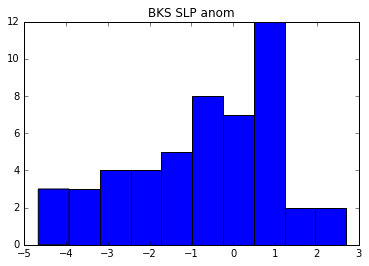

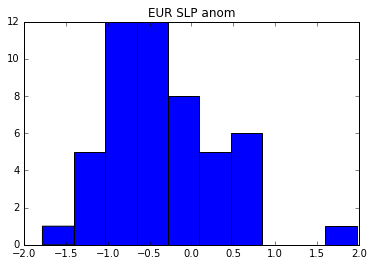

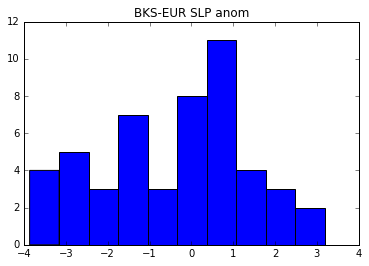

In [9]:
print leslpsp.shape
print leslpspan.shape
print lesatspan.shape

plt.figure()
plt.hist(lebkspran)
plt.title('BKS SLP anom')
plt.figure()
plt.hist(leeurpran)
plt.title('EUR SLP anom')

plt.figure()
plt.hist(lecircpran)
plt.title('BKS-EUR SLP anom')

In [10]:
# ============= scatter plot of anomalies (from plot_coldeurasia_ts notebook)
#       get obs data point

timesel='1979-01-01,2014-12-31'

obspath= '/HOME/rkm/work/DATA/'
obspath2 = '/HOME/rkm/work/BCs/'

graveraint= 9.80665 # m/s2 (different from Canadian models)

regions = {'EUR': 'eurasiamori',
           'BKS': 'bksmori'}

fnames={'sat': obspath + 'GISS/gistemp1200_ERSSTv4.nc',
           'z500': obspath + 'ERAINT/td_era_int_197901_201507_gp_128_64_phi500_1979011612-2015071612.nc',
        'slp': obspath + 'ERAINT/td_era_int_197901_latest_gp_128_64_pmsl.001_1979011612-2015121612.nc'}
fields={'sat': 'tempanomaly',
        'z500': 'PHI',
        'slp': 'PMSL'}
convsobs = {'sat': 100,
         'z500': 1/graveraint,
         'slp': 1} # @@@@@NOTE have to mult by scale_factor for GISS sat -- no longer works in cccmaNC?? 3/21/16


# OBS: LOAD DATA
sea='DJF'

flddt={}; fldregdt={}; latdt={}; londt={}; xxdt={}
for fkey in fnames.keys():
    fname = fnames[fkey]
    conv = convsobs[fkey]
    print fname, fields[fkey], conv
    
    fld = cnc.getNCvar(fname,fields[fkey],timesel=timesel,seas=sea)*conv 
    latdt[fkey] = cnc.getNCvar(fname,'lat')
    londt[fkey] = cnc.getNCvar(fname,'lon')

    flddt[fkey] = fld

    regdt={}
    for regkey in regions.keys():
        print regkey
        regdt[regkey] = cutl.calc_regmean(fld,latdt[fkey],londt[fkey],regions[regkey],model=None)

    xxdt[fkey] = np.arange(0,len(regdt[regkey])) # length of last reg good for all reg in field
    fldregdt[fkey] = regdt
    


eursat=fldregdt['sat']['EUR']
bksz500 = fldregdt['z500']['BKS']
eurz500 = fldregdt['z500']['EUR']

bksz5002=bksz500[:-2] # this should match "anomaly time periods"
eurz5002=eurz500[:-2]
eursat2=eursat[:-2]
circind2 = (bksz5002-bksz5002[:10].mean())/bksz5002.std() - (eurz5002-eurz5002[:10].mean())/eurz5002.std()

testobscircanom = circind2[-10:].mean() - circind2[:10].mean()
testobseuranom = eursat2[-10:].mean() - eursat2[:10].mean()
print testobscircanom
print testobseuranom

bksslp = fldregdt['slp']['BKS']
eurslp = fldregdt['slp']['EUR']

bksslp2=bksslp[:-2] # this should match "anomaly time periods"
eurslp2=eurslp[:-2]
slpcircind2 = (bksslp2-bksslp2[:10].mean())/bksslp2.std() - (eurslp2-eurslp2[:10].mean())/eurslp2.std()

testobsslpcircanom = slpcircind2[-10:].mean() - slpcircind2[:10].mean()


# LE ---------
leeursatran = leeursatr[-10:,...].mean(axis=0) - leeursatr[:10,...].mean(axis=0)
lecirczrstdan = lecirczrstd[-10:,...].mean(axis=0) - lecirczrstd[:10,...].mean(axis=0)
lecircprstdan = lecircprstd[-10:,...].mean(axis=0) - lecircprstd[:10,...].mean(axis=0)
# as opposed to :  lecircpranstd



print leeursatran.shape
print lecirczran.shape

/HOME/rkm/work/DATA/ERAINT/td_era_int_197901_201507_gp_128_64_phi500_1979011612-2015071612.nc PHI 0.101971621298
lat: squeezing data upon read all
lon: squeezing data upon read all
BKS
calc_regmean() removing extra lon. fld new shape: (35, 64, 128)
EUR
calc_regmean() removing extra lon. fld new shape: (35, 64, 128)
/HOME/rkm/work/DATA/ERAINT/td_era_int_197901_latest_gp_128_64_pmsl.001_1979011612-2015121612.nc PMSL 1
lat: squeezing data upon read all
lon: squeezing data upon read all
BKS
calc_regmean() removing extra lon. fld new shape: (35, 64, 128)
EUR
calc_regmean() removing extra lon. fld new shape: (35, 64, 128)
/HOME/rkm/work/DATA/GISS/gistemp1200_ERSSTv4.nc tempanomaly 100
var_scale 0.01
lat: squeezing data upon read all
lon: squeezing data upon read all
BKS
EUR
1.06555760742
-0.412096786154
(50,)
(50,)


(33, 50)
[ 1.61074176  0.74047931  0.9615732   2.02055823  0.56749244  1.50192154
  0.94798811  1.28748384  0.75971744  0.80293135  1.90260457  0.46539554
  0.93499517  1.12393867  2.60954447  1.72301585  1.69999983  1.57232944
  1.63198129 -0.07469998  0.54513658  0.65966142  1.27628591  2.00533432
  1.49076453  2.0496894   1.86747538  1.3034324   2.07062035 -0.34458087
  1.94936849  1.14372854  1.88226793 -0.03242825  1.11153654  1.38317271
  1.83883869  2.13481389  0.19539383  1.52908378  1.68405167  1.50236754
  0.63856837  1.67291478  0.41303585  1.77774523  2.00955877  1.89268802
  1.60974436  1.21066911]


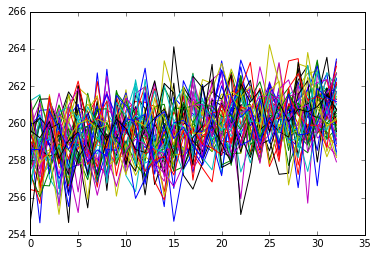

In [11]:
plt.figure()
plt.plot(leeursatr)
print leeursatr.shape

print leeursatran

bks
(50,)
[[ 223.10224275  225.10976277  190.50044403 ...,  202.83659477
   226.87564809  220.47883461]
 [ 226.39440701  224.9907118   192.7628838  ...,  204.2641461   227.29994698
   220.7297896 ]
 [ 225.52159077  224.96040887  190.77851442 ...,  204.49310119
   226.72457277  219.30760593]
 ..., 
 [ 224.67042711  224.92855324  190.96973274 ...,  202.71072175
   227.18954462  219.14517482]
 [ 224.63518065  223.78545012  191.21848011 ...,  204.63954522
   226.04247831  219.36154267]
 [ 226.01729999  222.63903751  191.83758358 ...,  204.39893339
   226.40362843  219.06729149]]
bksanom
[-1.63033861 -1.17593011  1.38473619 -3.71139133  0.15242398 -1.80082825
 -0.56715285  2.70122477  0.73566121 -0.08137227 -2.49674717  0.85500922
 -2.75456285  0.34099121 -3.54487949 -0.57778286  0.39246162 -0.09129822
 -0.89571859  0.98782267  0.55002462  0.75538079 -1.79854397 -2.76270081
  0.72470696 -0.43556763 -2.8150019  -0.75361443  0.14230774  0.90508769
 -4.23296061 -1.66873725  0.81952257  1.81691

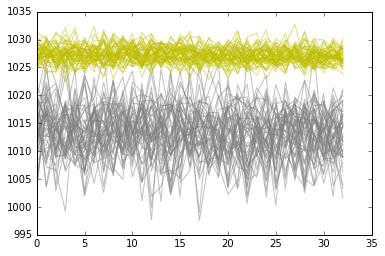

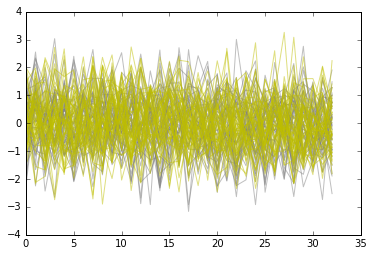

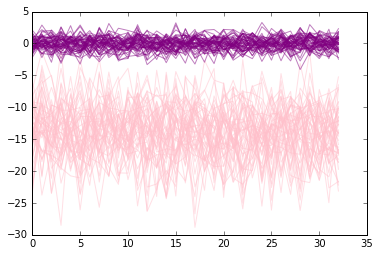

In [12]:
#@@@
print 'bks' 
print lebkspr.std(axis=0).shape
print lebkspr/lebkspr.std(axis=0)

print 'bksanom'
print lebkspran
print 'eur'
print leeurpr
print leeurpr/leeurpr.std(axis=0)

print 'euranom'
print leeurpran
print 'circ'
print lecircpr
print 'circanom'
print lecircpran


plt.figure()
ret = plt.plot(lebkspr, color='0.5',alpha=0.5)
ret = plt.plot(leeurpr, color='y',alpha=0.5)

plt.figure()
ret = plt.plot((lebkspr-lebkspr.mean(axis=0))/lebkspr.std(axis=0), color='0.5',alpha=0.5)
ret = plt.plot((leeurpr-leeurpr.mean(axis=0))/leeurpr.std(axis=0), color='y',alpha=0.5)

plt.figure()
ret = plt.plot(lecircpr, color='pink',alpha=0.5)
ret = plt.plot(lecircprstd, color='purple',alpha=0.5)

print 'lecircprstd'
print lecircprstd.shape

In [13]:
print leeursatran
print lecirczrstdan

[ 1.61074176  0.74047931  0.9615732   2.02055823  0.56749244  1.50192154
  0.94798811  1.28748384  0.75971744  0.80293135  1.90260457  0.46539554
  0.93499517  1.12393867  2.60954447  1.72301585  1.69999983  1.57232944
  1.63198129 -0.07469998  0.54513658  0.65966142  1.27628591  2.00533432
  1.49076453  2.0496894   1.86747538  1.3034324   2.07062035 -0.34458087
  1.94936849  1.14372854  1.88226793 -0.03242825  1.11153654  1.38317271
  1.83883869  2.13481389  0.19539383  1.52908378  1.68405167  1.50236754
  0.63856837  1.67291478  0.41303585  1.77774523  2.00955877  1.89268802
  1.60974436  1.21066911]
[-0.24121161 -0.28816975 -0.32953123 -1.44165989 -0.16488611 -1.07021894
  0.31476781 -0.3724936  -0.36382044  0.11310303 -0.27205599  0.63107236
 -0.72332012  0.12321778 -1.15149394 -0.67674231 -0.28748797 -0.15274183
 -0.41567398  0.83388905 -0.41962832  0.5354793  -0.69818444 -0.90569741
 -0.73176965 -0.53011192 -0.61973609 -0.73884949 -0.77349027  1.02753939
 -1.09117431 -0.35973858 

mm, bb, r, p
-0.831381090437 0.991969347346 -0.76551370736 9.48174767859e-11


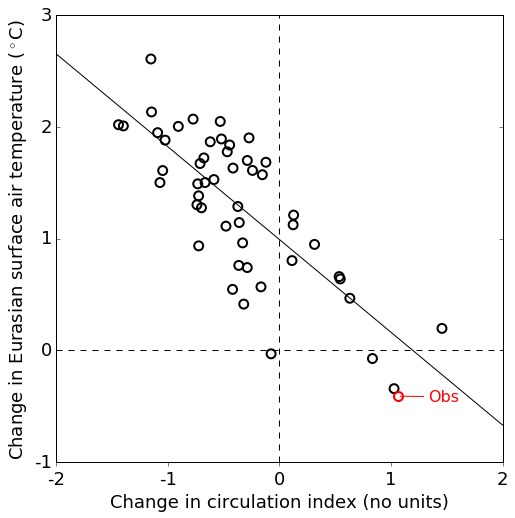

In [14]:
# ============= scatter plot of anomalies (from plot_coldeurasia_ts notebook)

printtofile=False
fsz=18

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,8)
ax.scatter(lecirczrstdan,leeursatran, linewidths=2,edgecolor='k',s=80, facecolors='none', marker='o')
ax.plot(testobscircanom,testobseuranom,marker='o',markersize=9,markerfacecolor='none',color='r',markeredgewidth=2,mec='r')
ax.annotate('Obs', xy=(testobscircanom,testobseuranom), 
            xycoords='data',
            textcoords='offset points',xytext=(30,-5),
            arrowprops=dict(arrowstyle='-',
                            facecolor='r', edgecolor='r'), fontsize=fsz-2, color='r') 
            #,connectionstyle='arc3'#xytext = (testobscircanom+.1,testobseuranom), 
ax.set_xlabel('Change in circulation index (no units)', fontsize=fsz)
ax.set_ylabel('Change in Eurasian surface air temperature ($^\circ$C)', fontsize=fsz)
ax.set_ylim((-1,3))
ax.set_xlim((-2,2))

ax.axvline(x=0,linestyle='--',color='k')
ax.axhline(y=0,linestyle='--',color='k')

ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(direction='out',which='both')
#ax.tick_params('x', length=7, width=2, which='major',labelsize=fsz-2)
#ax.tick_params('x', length=3, width=1, which='minor')
ax.tick_params('y',labelsize=fsz-2)
ax.tick_params('x',labelsize=fsz-2)

##ax.minorticks_on()
ax.set_yticks(np.arange(-1,4))
ax.set_yticklabels(np.arange(-1,4),fontsize=fsz)
ax.set_xticks(np.arange(-2,3))
ax.set_xticklabels(np.arange(-2,3),fontsize=fsz)

testmm,testbb,test_r,test_p = cutl.regress(lecirczrstdan,leeursatran) # mm, bb, r-val, p-val
#plt.annotate('r='+str(test_r),xy=(.7,.85),xycoords='figure fraction')

axylims = ax.get_ylim()
axxlims = ax.get_xlim()
onex=np.linspace(axxlims[0],axxlims[1])
ax.plot(onex,testmm*onex + testbb, color='k',linewidth=1)

print 'mm, bb, r, p'
print testmm,testbb,test_r,test_p
if printtofile:
    fig.savefig('Figure_4_kem.pdf')

mm, bb, r, p
-0.0177078146179 1.30606337805 -0.0141097754197 0.922525909697
mm, bb, r, p
-0.238220774998 1.13447763611 -0.651199519274 3.04277191343e-07
mm, bb, r, p
0.0833600590616 0.221817960587 0.273810796115 0.0543403998417


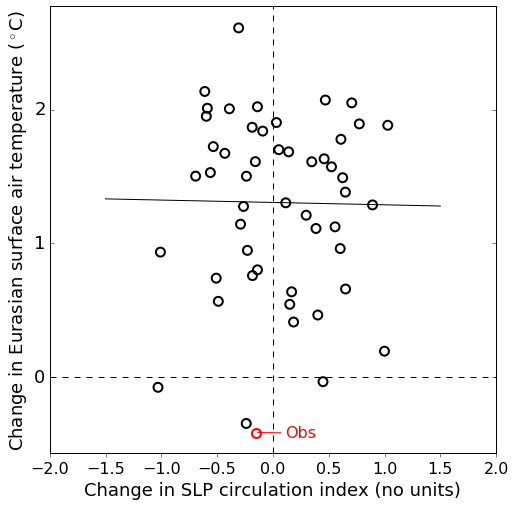

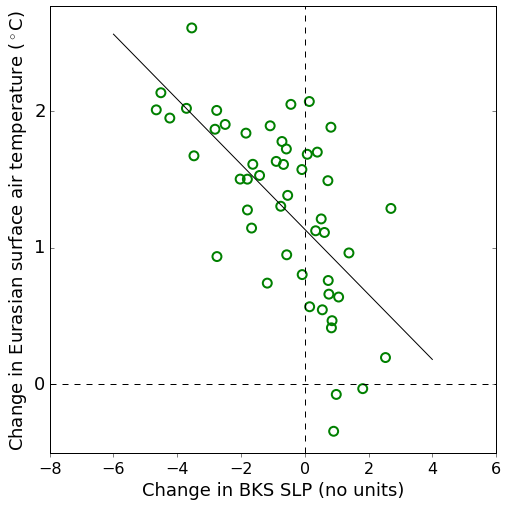

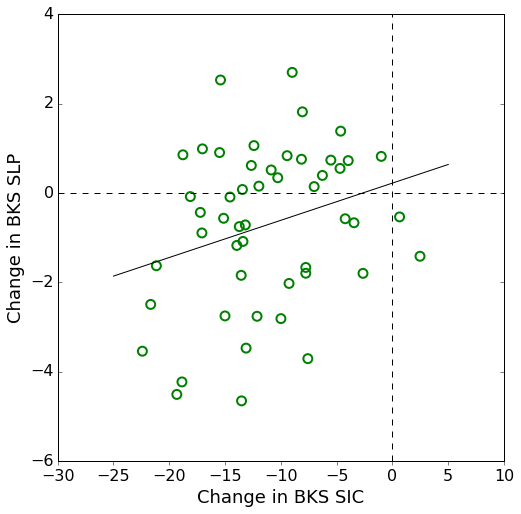

In [15]:
# ============= SLP: scatter plot of anomalies (from plot_coldeurasia_ts notebook)

printtofile=False
fsz=18

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,8)
ax.scatter(lecircprstdan,leeursatran, linewidths=2,edgecolor='k',s=80, facecolors='none', marker='o')
#ax.scatter(lebkspran,leeursatran, linewidths=2,edgecolor='g',s=80, facecolors='none', marker='o')
#ax.scatter(lecircpran,leeursatran, linewidths=2,edgecolor='cyan',s=80, facecolors='none', marker='o')

ax.plot(testobsslpcircanom,testobseuranom,marker='o',markersize=9,markerfacecolor='none',color='r',markeredgewidth=2,mec='r')
ax.annotate('Obs', xy=(testobsslpcircanom,testobseuranom), 
            xycoords='data',
            textcoords='offset points',xytext=(30,-5),
            arrowprops=dict(arrowstyle='-',
                            facecolor='r', edgecolor='r'), fontsize=fsz-2, color='r') 
            #,connectionstyle='arc3'#xytext = (testobscircanom+.1,testobseuranom), 
ax.set_xlabel('Change in SLP circulation index (no units)', fontsize=fsz)
ax.set_ylabel('Change in Eurasian surface air temperature ($^\circ$C)', fontsize=fsz)
#ax.set_ylim((-1,3))
#ax.set_xlim((-2,2))

ax.axvline(x=0,linestyle='--',color='k')
ax.axhline(y=0,linestyle='--',color='k')

ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(direction='out',which='both')
#ax.tick_params('x', length=7, width=2, which='major',labelsize=fsz-2)
#ax.tick_params('x', length=3, width=1, which='minor')
ax.tick_params('y',labelsize=fsz-2)
ax.tick_params('x',labelsize=fsz-2)

##ax.minorticks_on()
ax.set_yticks(np.arange(-1,4))
ax.set_yticklabels(np.arange(-1,4),fontsize=fsz)
#ax.set_xticks(np.arange(-2,3))
#ax.set_xticklabels(np.arange(-2,3),fontsize=fsz)

testmm,testbb,test_r,test_p = cutl.regress(lecircprstdan,leeursatran) # mm, bb, r-val, p-val

#plt.annotate('r='+str(test_r),xy=(.7,.85),xycoords='figure fraction')

axylims = ax.get_ylim()
axxlims = ax.get_xlim()
onex=np.linspace(axxlims[0],axxlims[1])
ax.plot(onex,testmm*onex + testbb, color='k',linewidth=1)

print 'mm, bb, r, p'
print testmm,testbb,test_r,test_p
if printtofile:
    fig.savefig('SLPcircidx_v_EURsat_scatter.pdf')
    
    
 
# EUR SAT vs BKS SLP

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,8)
ax.scatter(lebkspran,leeursatran, linewidths=2,edgecolor='g',s=80, facecolors='none', marker='o')
#ax.scatter(lecircpran,leeursatran, linewidths=2,edgecolor='cyan',s=80, facecolors='none', marker='o')

#ax.plot(testobsslpcircanom,testobseuranom,marker='o',markersize=9,markerfacecolor='none',color='r',markeredgewidth=2,mec='r')
#ax.annotate('Obs', xy=(testobsslpcircanom,testobseuranom), 
#            xycoords='data',
#            textcoords='offset points',xytext=(30,-5),
#            arrowprops=dict(arrowstyle='-',
#                            facecolor='r', edgecolor='r'), fontsize=fsz-2, color='r') 
            #,connectionstyle='arc3'#xytext = (testobscircanom+.1,testobseuranom), 
ax.set_xlabel('Change in BKS SLP (no units)', fontsize=fsz)
ax.set_ylabel('Change in Eurasian surface air temperature ($^\circ$C)', fontsize=fsz)
#ax.set_ylim((-1,3))
#ax.set_xlim((-2,2))

ax.axvline(x=0,linestyle='--',color='k')
ax.axhline(y=0,linestyle='--',color='k')

ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(direction='out',which='both')
#ax.tick_params('x', length=7, width=2, which='major',labelsize=fsz-2)
#ax.tick_params('x', length=3, width=1, which='minor')
ax.tick_params('y',labelsize=fsz-2)
ax.tick_params('x',labelsize=fsz-2)

##ax.minorticks_on()
ax.set_yticks(np.arange(-1,4))
ax.set_yticklabels(np.arange(-1,4),fontsize=fsz)
#ax.set_xticks(np.arange(-2,3))
#ax.set_xticklabels(np.arange(-2,3),fontsize=fsz)

testmm,testbb,test_r,test_p = cutl.regress(lebkspran,leeursatran) # mm, bb, r-val, p-val
#plt.annotate('r='+str(test_r),xy=(.7,.85),xycoords='figure fraction')

axylims = ax.get_ylim()
axxlims = ax.get_xlim()
onex=np.linspace(axxlims[0],axxlims[1])
ax.plot(onex,testmm*onex + testbb, color='k',linewidth=1)

print 'mm, bb, r, p'
print testmm,testbb,test_r,test_p
if printtofile:
    fig.savefig('BKSSLP_v_EURsat_scatter.pdf')
    

    
# BKS SLP v BKS SIC

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,8)
ax.scatter(lebkssicran,lebkspran, linewidths=2,edgecolor='g',s=80, facecolors='none', marker='o')
#ax.scatter(lecircpran,leeursatran, linewidths=2,edgecolor='cyan',s=80, facecolors='none', marker='o')

#ax.plot(testobsslpcircanom,testobseuranom,marker='o',markersize=9,markerfacecolor='none',color='r',markeredgewidth=2,mec='r')
#ax.annotate('Obs', xy=(testobsslpcircanom,testobseuranom), 
#            xycoords='data',
#            textcoords='offset points',xytext=(30,-5),
#            arrowprops=dict(arrowstyle='-',
#                            facecolor='r', edgecolor='r'), fontsize=fsz-2, color='r') 
            #,connectionstyle='arc3'#xytext = (testobscircanom+.1,testobseuranom), 
ax.set_xlabel('Change in BKS SIC', fontsize=fsz)
ax.set_ylabel('Change in BKS SLP', fontsize=fsz)
#ax.set_ylim((-1,3))
#ax.set_xlim((-2,2))

ax.axvline(x=0,linestyle='--',color='k')
ax.axhline(y=0,linestyle='--',color='k')

ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(direction='out',which='both')
#ax.tick_params('x', length=7, width=2, which='major',labelsize=fsz-2)
#ax.tick_params('x', length=3, width=1, which='minor')
ax.tick_params('y',labelsize=fsz-2)
ax.tick_params('x',labelsize=fsz-2)

##ax.minorticks_on()
#ax.set_yticks(np.arange(-1,4))
#ax.set_yticklabels(np.arange(-1,4),fontsize=fsz)
#ax.set_xticks(np.arange(-2,3))
#ax.set_xticklabels(np.arange(-2,3),fontsize=fsz)

testmm,testbb,test_r,test_p = cutl.regress(lebkssicran,lebkspran) # mm, bb, r-val, p-val
#plt.annotate('r='+str(test_r),xy=(.7,.85),xycoords='figure fraction')

axylims = ax.get_ylim()
axxlims = ax.get_xlim()
onex=np.linspace(axxlims[0],axxlims[1])
ax.plot(onex,testmm*onex + testbb, color='k',linewidth=1)

print 'mm, bb, r, p'
print testmm,testbb,test_r,test_p
if printtofile:
    fig.savefig('BKSSIC_v_BKSSLP_scatter.pdf')
    


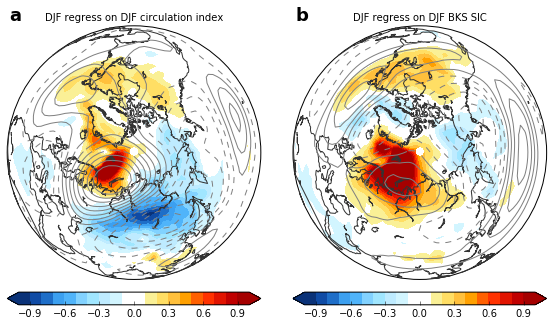

In [16]:
cminsp=-1; cmaxsp=1
cminsp2=-15; cmaxsp2=15

lons, lats = np.meshgrid(lon,lat)
cmlen=15.
incr = (cmaxsp2-cminsp2) / (cmlen)
conts = np.arange(cminsp2,cmaxsp2+incr,incr)

ttl1=seasp + ' regress on ' + sear + ' circulation index'
ttl2=seasp + ' regress on ' + sear + ' BKS SIC' 


fig,axs=plt.subplots(1,2)
fig.set_size_inches(10,5)
fig.subplots_adjust(wspace=0.05)
ax=axs[0]
bm,pc=cplt.kemmap(satoncirc,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl1,suppcb=False,
                  panellab='a',lcol='0.2') #cmin=cminsp,cmax=cmaxsp,
bm.contour(lons,lats,z500oncirc,levels=conts,
           colors='0.5',linewidths=1,latlon=True)#levels=conts,

ax=axs[1]
bm,pc=cplt.kemmap(-satonsic,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl2,suppcb=False,
                  panellab='b',lcol='0.2')

bm.contour(lons,lats,-z500onsic,levels=conts,
           colors='0.5',linewidths=1,latlon=True)

#cplt.add_colorbar(fig,pc,orientation='horizontal')


In [17]:
print slponcircp.shape
print z500oncircp.shape


(64, 128)
(64, 128)


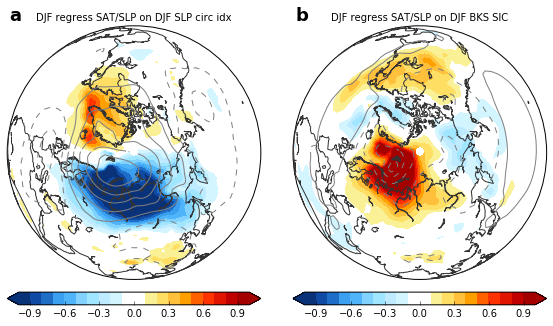

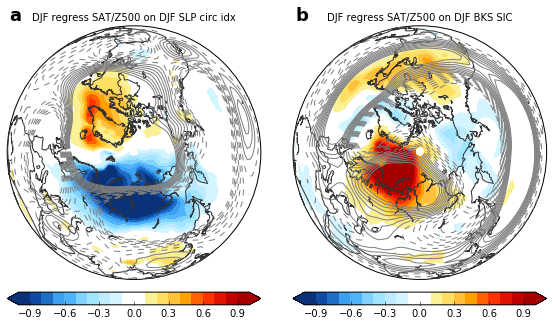

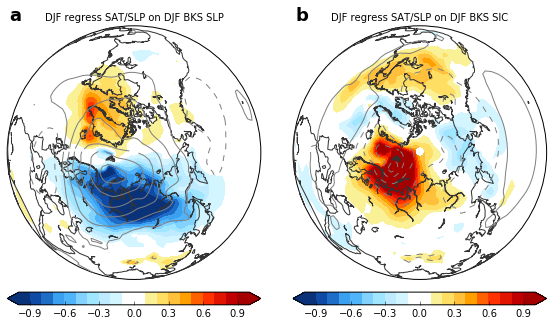

In [21]:
# REPEAT WITH SLP NOW
cplt=reload(cplt)


cminsp=-1; cmaxsp=1
cminsp2=-3; cmaxsp2=3

lons, lats = np.meshgrid(lon,lat)
cmlen=15.
incr = (cmaxsp2-cminsp2) / (cmlen)
conts = np.arange(cminsp2,cmaxsp2+incr,incr)

ttl1=seasp + ' regress SAT/SLP on ' + sear + ' SLP circ idx'
ttl2=seasp + ' regress SAT/SLP on ' + sear + ' BKS SIC' 


fig,axs=plt.subplots(1,2)
fig.set_size_inches(10,5)
fig.subplots_adjust(wspace=0.05)
ax=axs[0]
bm,pc=cplt.kemmap(satoncircp,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl1,suppcb=False,
                  panellab='a',lcol='0.2') #cmin=cminsp,cmax=cmaxsp,
bm.contour(lons,lats,slponcircp,levels=conts,
           colors='0.5',linewidths=1,latlon=True)#levels=conts,

ax=axs[1]
bm,pc=cplt.kemmap(-satonsic,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl2,suppcb=False,
                  panellab='b',lcol='0.2')

bm.contour(lons,lats,-slponsic,levels=conts,
           colors='0.5',linewidths=1,latlon=True)

#cplt.add_colorbar(fig,pc,orientation='horizontal')


# on SLP circidx (Z500 this time)
ttl1=seasp + ' regress SAT/Z500 on ' + sear + ' SLP circ idx'
ttl2=seasp + ' regress SAT/Z500 on ' + sear + ' BKS SIC' 


fig,axs=plt.subplots(1,2)
fig.set_size_inches(10,5)
fig.subplots_adjust(wspace=0.05)
ax=axs[0]
bm,pc=cplt.kemmap(satoncircp,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl1,suppcb=False,
                  panellab='a',lcol='0.2') #cmin=cminsp,cmax=cmaxsp,
bm.contour(lons,lats,z500oncircp,levels=conts,
           colors='0.5',linewidths=1,latlon=True)#levels=conts,

ax=axs[1]
bm,pc=cplt.kemmap(-satonsic,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl2,suppcb=False,
                  panellab='b',lcol='0.2')

bm.contour(lons,lats,-z500onsic,levels=conts,
           colors='0.5',linewidths=1,latlon=True)

#cplt.add_colorbar(fig,pc,orientation='horizontal')


# on BKS SLP
ttl1=seasp + ' regress SAT/SLP on ' + sear + ' BKS SLP'
ttl2=seasp + ' regress SAT/SLP on ' + sear + ' BKS SIC' 


fig,axs=plt.subplots(1,2)
fig.set_size_inches(10,5)
fig.subplots_adjust(wspace=0.05)
ax=axs[0]
bm,pc=cplt.kemmap(satonbksslp,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl1,suppcb=False,
                  panellab='a',lcol='0.2') #cmin=cminsp,cmax=cmaxsp,
bm.contour(lons,lats,slponbksslp,
           colors='0.5',linewidths=1,latlon=True)#levels=conts,

ax=axs[1]
bm,pc=cplt.kemmap(-satonsic,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl2,suppcb=False,
                  panellab='b',lcol='0.2')

bm.contour(lons,lats,-slponsic,levels=conts,
           colors='0.5',linewidths=1,latlon=True)

#cplt.add_colorbar(fig,pc,orientation='horizontal')

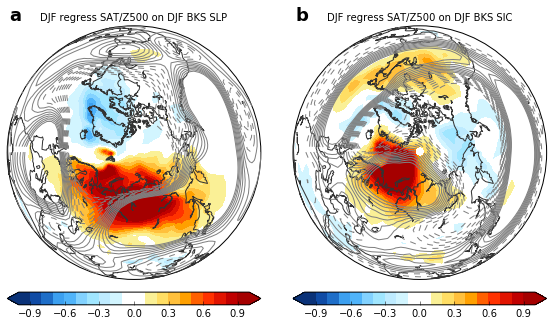

In [22]:
# on BKS SLP (Z500 this time)
ttl1=seasp + ' regress SAT/Z500 on ' + sear + ' BKS SLP'
ttl2=seasp + ' regress SAT/Z500 on ' + sear + ' BKS SIC' 

fig,axs=plt.subplots(1,2)
fig.set_size_inches(10,5)
fig.subplots_adjust(wspace=0.05)
ax=axs[0] 
# warming assoc w/ lower slp/sic loss(??@@). also minus the z500 field???
bm,pc=cplt.kemmap(-satonbksslp,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl1,suppcb=False,
                  panellab='a',lcol='0.2') #cmin=cminsp,cmax=cmaxsp,
bm.contour(lons,lats,-z500onbksslp,levels=conts,
           colors='0.5',linewidths=1,latlon=True)#levels=conts,

ax=axs[1] # warming assoc w/ sic loss
bm,pc=cplt.kemmap(-satonsic,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl2,suppcb=False,
                  panellab='b',lcol='0.2')

bm.contour(lons,lats,-z500onsic,levels=conts,
           colors='0.5',linewidths=1,latlon=True)

#cplt.add_colorbar(fig,pc,orientation='horizontal')

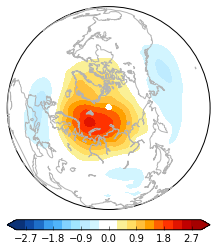

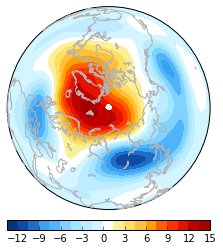

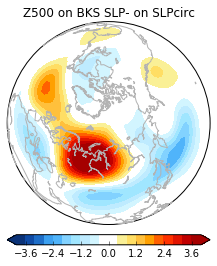

In [24]:
plt.figure()
cplt.kemmap(slponcircp,lat,lon,ptype='nheur',cmin=-3,cmax=3)


plt.figure()
cplt.kemmap(z500onbksslp,lat,lon,ptype='nheur')#,cmin=-4,cmax=4)


plt.figure()
cplt.kemmap(z500onbksslp-z500oncircp,lat,lon,ptype='nheur',cmin=-4,cmax=4)
plt.title('Z500 on BKS SLP- on SLPcirc')
# @@@ why don't these show a coherent SLP pattern?? Is it incorrect?

-0.251845195633 0.0776758970201
Regress circ index anom on bks sic anom. mm units (m/%)
mm,pval -1.67633681274 0.0776758970201
Portion of circ index anom associated with BKS SIC anom, for e/ ens member
[ 18.40055837  12.13230266   4.03965278   6.59829314  10.4130084
   2.29849033  13.16265912   7.81540116   4.80473026  15.75372967
  18.84367298  16.33233623  13.05233831   8.94223163  19.49115026
   3.68731483   5.46131101  12.66442287  14.8523254   14.81057234
   4.08924105   7.09385395   6.75740225  10.55533528   3.45058729
  14.97590297   8.69551431  11.93814481   6.10465611  13.47558929
  16.40838118   6.75694474   0.87447781   7.02219001  11.00153414
  -0.55065757  11.79031775  16.80817768  13.40272826  -2.14291335
  11.69443431   8.0623721   10.79682978  11.41078017   8.21309414
  11.46784666  11.76336586  11.65168372   3.00028489   9.45471796]
the residual (ie circ index anom - sea ice associated portion), standardized (no units)
[-0.48037576 -0.24535549 -0.15486423 -2.37101353  

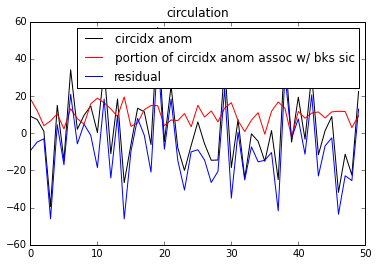

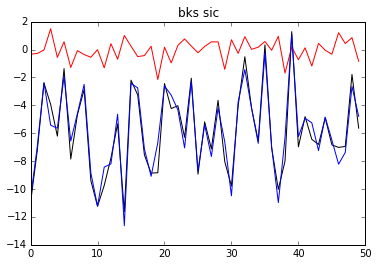

In [14]:
# Now want to remove the portion of the regression on circ index that is due to BKS SIC
#   BKS SIC is independent var (x) and circ index is dependent (y)

mmstd, bbstd, rvalstd, pvalstd = cutl.regress(lebkssicranstd, lecirczranstd) # these are standardized
#  mm is std circ / std %
print mmstd, pvalstd

mm, bb, rval, pval = cutl.regress(lebkssicran, lecirczran) 
# mm is m / %
print 'Regress circ index anom on bks sic anom. mm units (m/%)'
print 'mm,pval ' + str(mm), str(pval)

# portion of circ index anom explained by bks sic, for each ens member:
lecirczrdue2bkssic = lebkssicran*mm # units are m
print 'Portion of circ index anom associated with BKS SIC anom, for e/ ens member'
print lecirczrdue2bkssic # shape is 50 

# the residual, for each ens member
lecirczrnobkssic = lecirczran - lecirczrdue2bkssic # units are m
lecirczrnobkssicstd = lecirczrnobkssic/lecirczrnobkssic.std() # no units (STD)
print 'the residual (ie circ index anom - sea ice associated portion), standardized (no units)'
print lecirczrnobkssicstd

plt.figure
plt.plot(lecirczran,'k')
plt.plot(lecirczrdue2bkssic,'r')
plt.plot(lecirczrnobkssic,'b')
plt.title('circulation')
plt.legend(('circidx anom','portion of circidx anom assoc w/ bks sic','residual'),loc='best')

# now redo spatial regressions (on standardized residual):
satoncircnosic = slopemap(lecirczrnobkssicstd,lesatspan,(nlat,nlon)) # SAT regress on circidx residual
z500oncircnosic = slopemap(lecirczrnobkssicstd,lezspan,(nlat,nlon)) # Z500 regress on circidx residual


# NOW DO THE REVERSE (BKS SIC DUE TO CIRC IDX)
mm2, bb2, rval2, pval2 = cutl.regress(lecirczran,lebkssicran) # these are standardized
# mm is % / m
print mm2, pval2

# portion of bks sic explained by circulation index:
lebkssicrdue2circ = lecirczran*mm2 # units are %

# the residual
lebkssicrnocirc = lebkssicran - lebkssicrdue2circ  # units are %
lebkssicrnocircstd = lebkssicrnocirc/lebkssicrnocirc.std() # no units (STD)

plt.figure()
plt.plot(lebkssicran,'k')
plt.plot(lebkssicrdue2circ,'r')
plt.plot(lebkssicrnocirc, 'b')
plt.title('bks sic')


# now redo spatial regressions (on standardized residual)
satonsicnocirc = slopemap(lebkssicrnocircstd,lesatspan,(nlat,nlon)) # SAT regress on regSIC
z500onsicnocirc = slopemap(lebkssicrnocircstd,lezspan,(nlat,nlon)) # Z500 regress on regSIC


[-15. -12.  -9.  -6.  -3.   3.   6.   9.  12.  15.]


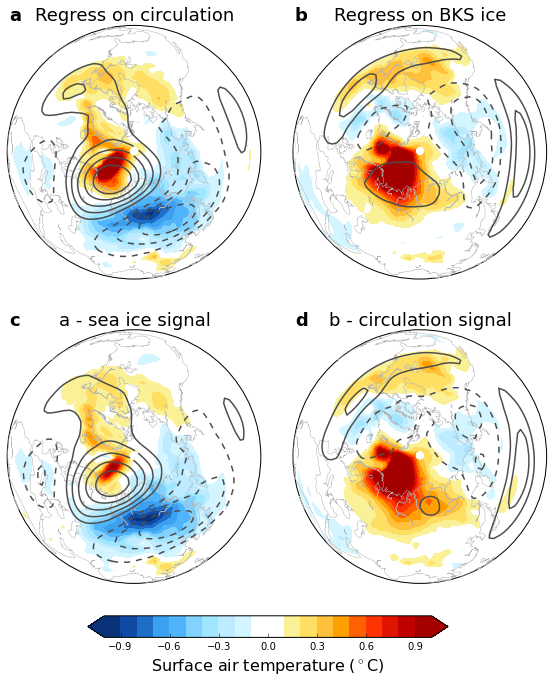

In [15]:
printtofile=False

cplt=reload(cplt)

contcol='0.3'
fsz=18
lws=1.5

cminsp=-1; cmaxsp=1
cminsp2=-15; cmaxsp2=15

lons, lats = np.meshgrid(lon,lat)
cmlenb=15. # for reg on bks sic
incrb = (cmaxsp2-cminsp2) / (cmlenb)
contsb = np.arange(cminsp2,cmaxsp2+incrb,incrb)

cmlen=10. # for reg on circ idx
incr = (cmaxsp2-cminsp2) / (cmlen)
conts = np.arange(cminsp2,cmaxsp2+incr,incr)

contsb=conts # same conts for both
conts=contsb=conts[np.logical_or(conts<0, conts>0)] # get rid of zero line


print conts

ttl1='Regress on circulation' #Circulation congruent'
ttl2='Regress on BKS ice' #Sea ice congruent'
ttl3='a - sea ice signal'
ttl4='b - circulation signal'

plotparams = {'lcol':'0.7', 'cmin': cminsp, 'cmax': cmaxsp, 'suppcb': True,
              'ptype': 'nheur', 'coastres': 'c', 'coastwidth': 0.5, 
              'area_thresh':70000}

fig,axs=plt.subplots(2,2)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace=0.05)
ax=axs[0,0]
bm,pc=cplt.kemmap(satoncirc,lat,lon, axis=ax,title=ttl1,
                  panellab='a',**plotparams) 
cplt.add_contours(bm, z500oncirc,lat,lon,levels=conts,colors=contcol,linewidths=lws)
ax.set_title(ttl1,fontsize=fsz)

ax=axs[0,1]
bm,pc=cplt.kemmap(-satonsic,lat,lon,axis=ax,title=ttl2,
                  panellab='b',**plotparams)
cplt.add_contours(bm, -z500onsic,lat,lon,levels=contsb,colors=contcol,linewidths=lws)
ax.set_title(ttl2,fontsize=fsz)


ax=axs[1,0]
bm,pc=cplt.kemmap(satoncircnosic,lat,lon,axis=ax,title=ttl3,
                  panellab='c',**plotparams) #cmin=cminsp,cmax=cmaxsp,
cplt.add_contours(bm, z500oncircnosic,lat,lon,levels=conts,colors=contcol,linewidths=lws)
#ax.set_xlabel('contours -15,15, interval=' + str(np.diff(conts)[0]) + 'm')
ax.set_title(ttl3,fontsize=fsz)

ax=axs[1,1]
bm,pc=cplt.kemmap(-satonsicnocirc,lat,lon,axis=ax,title=ttl4,
                  panellab='d',**plotparams)
cplt.add_contours(bm, -z500onsicnocirc,lat,lon,levels=contsb,colors=contcol,linewidths=lws)
#ax.set_xlabel('contour -15,15, interval=' + str(np.diff(contsb)[0]) + 'm')
ax.set_title(ttl4,fontsize=fsz)

cplt.add_colorbar(fig,pc,orientation='horizontal', 
                  label='Surface air temperature ($^\circ$C)',fontsize=16)

if printtofile:
    fig.savefig('circidx_bkssic_regressions_withresiduals_LE_' + seasp + '.pdf')
    fig.savefig('circidx_bkssic_regressions_withresiduals_LE_' + seasp + '.eps',format='eps',dpi=600)

In [16]:
contstst=conts[np.logical_or(conts<0, conts>0)]
print contstst

[-15. -12.  -9.  -6.  -3.   3.   6.   9.  12.  15.]


[-15. -12.  -9.  -6.  -3.   3.   6.   9.  12.  15.]


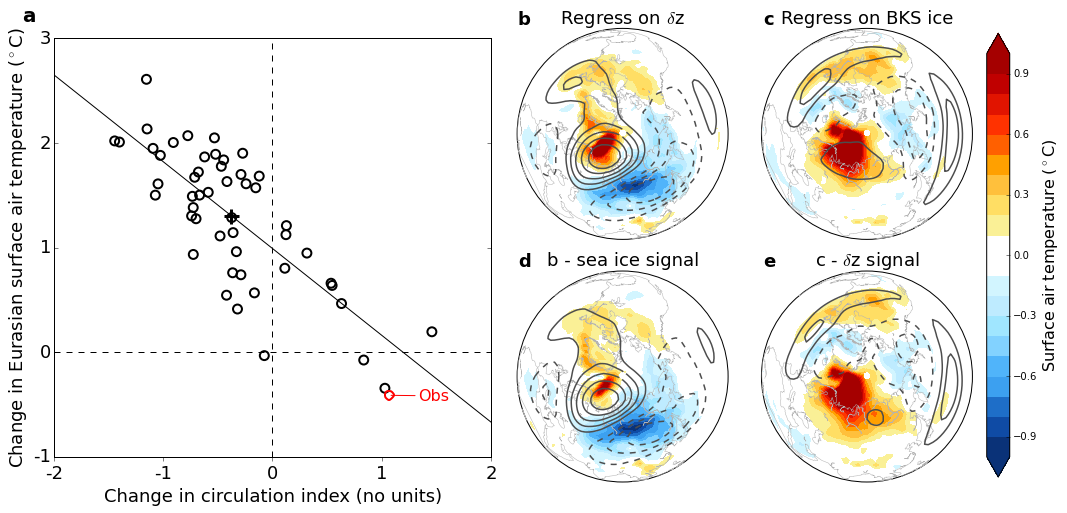

In [36]:
# COMBINE SCATTER WITH MAPS
from matplotlib import gridspec

printtofile=True

dohoriz=True

contcol='0.3'
fsz=18
lws=1.5

cminsp=-1; cmaxsp=1
cminsp2=-15; cmaxsp2=15

lons, lats = np.meshgrid(lon,lat)
cmlenb=15. # for reg on bks sic
incrb = (cmaxsp2-cminsp2) / (cmlenb)
contsb = np.arange(cminsp2,cmaxsp2+incrb,incrb)

cmlen=10. # for reg on circ idx
incr = (cmaxsp2-cminsp2) / (cmlen)
conts = np.arange(cminsp2,cmaxsp2+incr,incr)

contsb=conts # same conts for both
conts=contsb=conts[np.logical_or(conts<0, conts>0)] # get rid of zero line


print conts

ttl1='Regress on $\delta$z' #Circulation congruent'
ttl2='Regress on BKS ice' #Sea ice congruent'
ttl3='b - sea ice signal'
ttl4='c - $\delta$z signal'

plotparams = {'lcol':'0.7', 'cmin': cminsp, 'cmax': cmaxsp, 'suppcb': True,
              'ptype': 'nheur', 'coastres': 'c', 'coastwidth': 0.5, 
              'area_thresh':70000}



if dohoriz:
    fig = plt.figure(figsize=(16,7))
    gs1 = gridspec.GridSpec(2,2)
    gs1.update(top=0.93, left=0.09, bottom=0.1,right=0.47)
else:
    fig = plt.figure(figsize=(7,16))
    gs1 = gridspec.GridSpec(2,2)
    gs1.update(top=0.95,bottom = 0.57, left=0.09, right=0.95)

ax=plt.subplot(gs1[0:,0:])

ax.scatter(lecirczrstdan,leeursatran, linewidths=2,edgecolor='k',s=80, facecolors='none', marker='o')
ax.plot(lecirczrstdan.mean(),leeursatran.mean(), marker='+',markersize=15,color='k',mew=3,mec='k')

ax.plot(testobscircanom,testobseuranom,marker='o',markersize=9,markerfacecolor='none',color='r',markeredgewidth=2,mec='r')
ax.annotate('Obs', xy=(testobscircanom,testobseuranom), 
            xycoords='data',
            textcoords='offset points',xytext=(30,-5),
            arrowprops=dict(arrowstyle='-',
                            facecolor='r', edgecolor='r'), fontsize=fsz-2, color='r') 
            #,connectionstyle='arc3'#xytext = (testobscircanom+.1,testobseuranom), 
ax.set_xlabel('Change in circulation index (no units)', fontsize=fsz)
ax.set_ylabel('Change in Eurasian surface air temperature ($^\circ$C)', fontsize=fsz)
ax.set_ylim((-1,3))
ax.set_xlim((-2,2))

ax.axvline(x=0,linestyle='--',color='k')
ax.axhline(y=0,linestyle='--',color='k')

ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(direction='out',which='both')
#ax.tick_params('x', length=7, width=2, which='major',labelsize=fsz-2)
#ax.tick_params('x', length=3, width=1, which='minor')
ax.tick_params('y',labelsize=fsz-2)
ax.tick_params('x',labelsize=fsz-2)

##ax.minorticks_on()
ax.set_yticks(np.arange(-1,4))
ax.set_yticklabels(np.arange(-1,4),fontsize=fsz)
ax.set_xticks(np.arange(-2,3))
ax.set_xticklabels(np.arange(-2,3),fontsize=fsz)

testmm,testbb,test_r,test_p = cutl.regress(lecirczrstdan,leeursatran) # mm, bb, r-val, p-val
#plt.annotate('r='+str(test_r),xy=(.7,.85),xycoords='figure fraction')

axylims = ax.get_ylim()
axxlims = ax.get_xlim()
onex=np.linspace(axxlims[0],axxlims[1])
ax.plot(onex,testmm*onex + testbb, color='k',linewidth=1)
ax.annotate('a',xy=(-0.07,1.04),xycoords='axes fraction',fontsize=fsz+2,fontweight='bold')



# here want to put a 2x2 subplot.
gs2 = gridspec.GridSpec(2,2)
if dohoriz:
    gs2.update(top=0.95, left=0.48, bottom=0.05, 
               wspace=0.02,hspace=0.15)
else:
    gs2.update(top=0.5, left=0.09, bottom=0.05, right=0.97, 
               wspace=0.05,hspace=0.05)

ax=plt.subplot(gs2[0,0])
bm,pc=cplt.kemmap(satoncirc,lat,lon, axis=ax,
                  panellab='b',**plotparams) 
cplt.add_contours(bm, z500oncirc,lat,lon,levels=conts,colors=contcol,linewidths=lws)
ax.set_title(ttl1,fontsize=fsz)

ax=plt.subplot(gs2[0,1])
bm,pc=cplt.kemmap(-satonsic,lat,lon,axis=ax,
                  panellab='c',**plotparams)
cplt.add_contours(bm, -z500onsic,lat,lon,levels=contsb,colors=contcol,linewidths=lws)
ax.set_title(ttl2,fontsize=fsz)

ax=plt.subplot(gs2[1,0])
bm,pc=cplt.kemmap(satoncircnosic,lat,lon,axis=ax,
                  panellab='d',**plotparams) #cmin=cminsp,cmax=cmaxsp,
cplt.add_contours(bm, z500oncircnosic,lat,lon,levels=conts,colors=contcol,linewidths=lws)
#ax.set_xlabel('contours -15,15, interval=' + str(np.diff(conts)[0]) + 'm')
ax.set_title(ttl3,fontsize=fsz)

ax=plt.subplot(gs2[1,1])
bm,pc=cplt.kemmap(-satonsicnocirc,lat,lon,axis=ax,
                  panellab='e',**plotparams)
cplt.add_contours(bm, -z500onsicnocirc,lat,lon,levels=contsb,colors=contcol,linewidths=lws)
#ax.set_xlabel('contour -15,15, interval=' + str(np.diff(contsb)[0]) + 'm')
ax.set_title(ttl4,fontsize=fsz)

if dohoriz:
    #cbarpos=(0.53,0.07, 0.43,0.03)
    #cplt.add_colorbar(fig,pc,orientation='horizontal', pos=cbarpos,
    #                  label='Surface air temperature ($^\circ$C)',fontsize=16)
    cbarpos=(0.9,0.06, 0.02,0.88)
    cplt.add_colorbar(fig,pc,orientation='vertical', pos=cbarpos,
                      label='Surface air temperature ($^\circ$C)',fontsize=16)
else:
    cbarpos=(0.11,0.03, 0.83,0.02)
    cplt.add_colorbar(fig,pc,orientation='horizontal', pos=cbarpos,
                      label='Surface air temperature ($^\circ$C)',fontsize=16)

if printtofile:
    if dohoriz:
        fig.savefig('Figure_45_horiz2.pdf')
        fig.savefig('Figure_45_horiz2.eps',format='eps',dpi=600)
    else:
        fig.savefig('Figure_45.pdf')
        fig.savefig('Figure_45.eps',format='eps',dpi=600)

In [ ]:
# DON'T NEED BELOW ANYMORE:

In [38]:
# from canesm_LE_regress.py

def load_field(fdict,casename,timesel,seas,ftype='fullts',conv=1,local=True,verb=False):
    
    """ 
        returns [numens x space.flat] or [numens]

    """

    ledat = le.load_LEdata(fdict,casename,timesel=timesel, 
                           rettype='ndarray',conv=conv,ftype=ftype,local=local,verb=verb)

    print '@@@ ledat.shape ' + str(ledat.shape) # why does the 3d data have space flattened already...

    # time needs to be first dimension
    try:
        if ledat.ndim==2:
            ledat = ledat.T
        elif ledat.ndim==3:
            ledat = np.transpose(ledat,(1,0,2))
        else:
            print 'Loaded data is not 2 or 3 dimensions. Do not understand.'
            raise Exception
    except:
        raise

    lesea = cutl.seasonalize_monthlyts(ledat,season=seas).mean(axis=0)  # numens x space.flat

    return lesea



In [ ]:
# try again, this time w/ anomaly time periods selected initially
#  just like canesm_LE_regress.py

ftype='fullts'

# 2D (spatial)
fdictzsp = {'field': 'zg50000.00', 'ncfield': 'zg', 'comp': 'Amon'} # spatial
leczsp = load_field(fdictzsp,casename,timesel=timeselc,seas=seasp, ftype=ftype,
                    conv=1)
lepzsp = load_field(fdictzsp,casename,timesel=timeselp,seas=seasp, ftype=ftype,
                    conv=1)
lezsp_b = lepzsp - leczsp


fdictsatsp = {'field': 'tas', 'ncfield': 'tas', 'comp': 'Amon'}
lecsatsp = load_field(fdictsatsp,casename,timesel=timeselc,seas=seasp, ftype=ftype,
                    conv=1)
lepsatsp = load_field(fdictsatsp,casename,timesel=timeselp,seas=seasp, ftype=ftype,
                    conv=1)
lesatsp_b = lepsatsp - lecsatsp

In [55]:
# 1D (regional avg)
fdictbksz = {'field': 'zg50000.00'+ regions['BKS'], 'ncfield': 'zg', 'comp': 'Amon'}
lecbkszr = load_field(fdictbksz,casename,timesel=timeselc,seas=seasp, ftype=ftype,
                    conv=1)
lepbkszr = load_field(fdictbksz,casename,timesel=timeselp,seas=seasp, ftype=ftype,
                    conv=1)
lebkszr_b = lepbkszr - lecbkszr
lebkszr_b = lebkszr_b / lebkszr_b.std()

#  skip circ index for the moment
#fdicteurz = {'field': 'zg50000.00'+ regions['EUR'], 'ncfield': 'zg', 'comp': 'Amon'}


fdictbkssic = {'field': 'sic'+ regions['BKS'], 'ncfield': 'sic', 'comp': 'OImon'}
lecbkssicr = load_field(fdictbkssic,casename,timesel=timeselc,seas=seasp, ftype=ftype,
                    conv=1)
lepbkssicr = load_field(fdictbkssic,casename,timesel=timeselp,seas=seasp, ftype=ftype,
                    conv=1)
lebkssicr_b = lepbkssicr - lecbkssicr
lebkssicr_b = lebkssicr_b/lebkssicr_b.std()

(50, 132)
(50, 132)
@@@ ledat.shape (50, 132)
(50, 132)
(50, 132)
@@@ ledat.shape (50, 132)
(50, 132)
(50, 132)
@@@ ledat.shape (50, 132)
(50, 132)
(50, 132)
@@@ ledat.shape (50, 132)


In [56]:
satonsic_b = slopemap(lebkssicr_b,lesatsp_b,(nlat,nlon)) # SAT regress on regSIC
z500onsic_b = slopemap(lebkssicr_b,lezsp_b,(nlat,nlon)) # Z500 regress on regSIC

satonbksz = slopemap(lebkszr_b,lesatsp_b,(nlat,nlon)) # SAT regress on regZ500
z500onbksz = slopemap(lebkszr_b,lezsp_b,(nlat,nlon)) # Z500 regress on regZ500


<matplotlib.contour.QuadContourSet instance at 0x2b39ac5a9878>

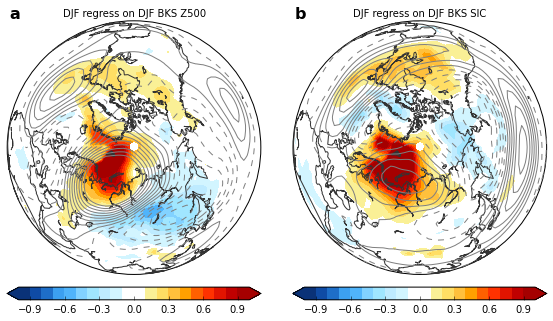

In [57]:
cminsp=-1; cmaxsp=1
cminsp2=-10; cmaxsp2=10

lons, lats = np.meshgrid(lon,lat)
cmlen=15.
incr = (cmaxsp2-cminsp2) / (cmlen)
conts = np.arange(cminsp2,cmaxsp2+incr,incr)

ttl1=seasp + ' regress on ' + sear + ' BKS Z500'
ttl2=seasp + ' regress on ' + sear + ' BKS SIC' 


fig,axs=plt.subplots(1,2)
fig.set_size_inches(10,5)
fig.subplots_adjust(wspace=0.05)
ax=axs[0]
bm,pc=cplt.kemmap(satonbksz,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl1,suppcb=False,
                  panellab='a',lcol='0.2') #cmin=cminsp,cmax=cmaxsp,
bm.contour(lons,lats,z500onbksz,levels=conts,
           colors='0.5',linewidths=1,latlon=True)#levels=conts,

ax=axs[1]
bm,pc=cplt.kemmap(-satonsic_b,lat,lon,ptype='nheur',axis=ax,cmin=cminsp,cmax=cmaxsp,
                  title=ttl2,suppcb=False,
                  panellab='b',lcol='0.2')

bm.contour(lons,lats,-z500onsic_b,levels=conts,
           colors='0.5',linewidths=1,latlon=True)

#cplt.add_colorbar(fig,pc,orientation='horizontal')